#PLAN stage
#==>Prepare by reading in the data, viewing the data dictionary, and exploring the dataset to identify key variables for the stakeholder.

In [26]:
#IMPORTS AND DATA LOADING
#Import packages for data manipulation.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from tabulate import tabulate

In [ ]:
pip install openpyxl

Load the dataset into a dataframe. Creating a dataframe will help you conduct data manipulation, exploratory data analysis (EDA), and statistical activities.

In [7]:
file_path = (r'C:\Users\Dell\Desktop\DATA SCIENCE COURSE (INTERNSHALA)\python\FEV-data-Excel.xlsx')

In [10]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\DATA SCIENCE COURSE (INTERNSHALA)\python\FEV-data-Excel.xlsx - csv.csv")

In [12]:
#SUMMARY INFORMATION
df.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


#Task 1 – Filter and Group by Manufacturer

Customer Criteria:
Budget: 350,000 PLN (i.e. the minimal price is at or below this limit)
Minimum Range: 400 km (WLTP range)

After filtering for these criteria, we group by Make (manufacturer) and compute the average battery capacity for each.

In [19]:
# Task 1a: Filter EVs that are within the budget and meet minimum range requirements
filtered_df = df[(df["Minimal price (gross) [PLN]"] <= 350000) & (df["Range (WLTP) [km]"] >= 400)]
# Task 1b and 1c: Group by manufacturer and calculate the average battery capacity
avg_battery_per_make = filtered_df.groupby("Make")["Battery capacity [kWh]"].mean().reset_index()
# Display the filtered DataFrame
print("Filtered EVs:")
print(tabulate(filtered_df[["Make", "Model", "Minimal price (gross) [PLN]", "Range (WLTP) [km]", "Battery capacity [kWh]"]], headers='keys', tablefmt='grid'))
print("\nAverage Battery Capacity by Manufacturer:")
print(tabulate(avg_battery_per_make, headers='keys', tablefmt='grid'))

Filtered EVs:
+----+---------------+-----------------------------+-------------------------------+---------------------+--------------------------+
|    | Make          | Model                       |   Minimal price (gross) [PLN] |   Range (WLTP) [km] |   Battery capacity [kWh] |
+====+===============+=============================+===============================+=====================+==========================+
|  0 | Audi          | e-tron 55 quattro           |                        345700 |                 438 |                       95 |
+----+---------------+-----------------------------+-------------------------------+---------------------+--------------------------+
|  8 | BMW           | iX3                         |                        282900 |                 460 |                       80 |
+----+---------------+-----------------------------+-------------------------------+---------------------+--------------------------+
| 15 | Hyundai       | Kona electric 64kWh      

#Task 2 – Outlier Detection in Energy Consumption
For energy consumption (in kWh per 100 km), we will employ the interquartile range (IQR) method. Outliers are defined as those values that fall below Q1 − 1.5×IQR or above Q3 + 1.5×IQR.

In [28]:
energy_col = "mean - Energy consumption [kWh/100 km]"
Q1 = df[energy_col].quantile(0.25)
Q3 = df[energy_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[energy_col] < lower_bound) | (df[energy_col] > upper_bound)]

print("\nOutliers in Energy Consumption:")
print(tabulate(outliers[["Make", "Model", energy_col]], headers='keys', tablefmt='grid'))


Outliers in Energy Consumption:
+--------+---------+------------------------------------------+
| Make   | Model   | mean - Energy consumption [kWh/100 km]   |
+========+=========+==========================================+
+--------+---------+------------------------------------------+


No outliers were detected in the mean - Energy consumption [kWh/100 km] column using the IQR method. This indicates that the energy consumption values across the dataset are consistent without any extreme deviations.

Task 3- Relationship between Battery Capacity and Range

We visualize the relationship between the battery capacity and the WLTP range. A scatter plot helps us understand whether higher battery capacity generally translates into a longer range. Additionally, we can compute the correlation coefficient.

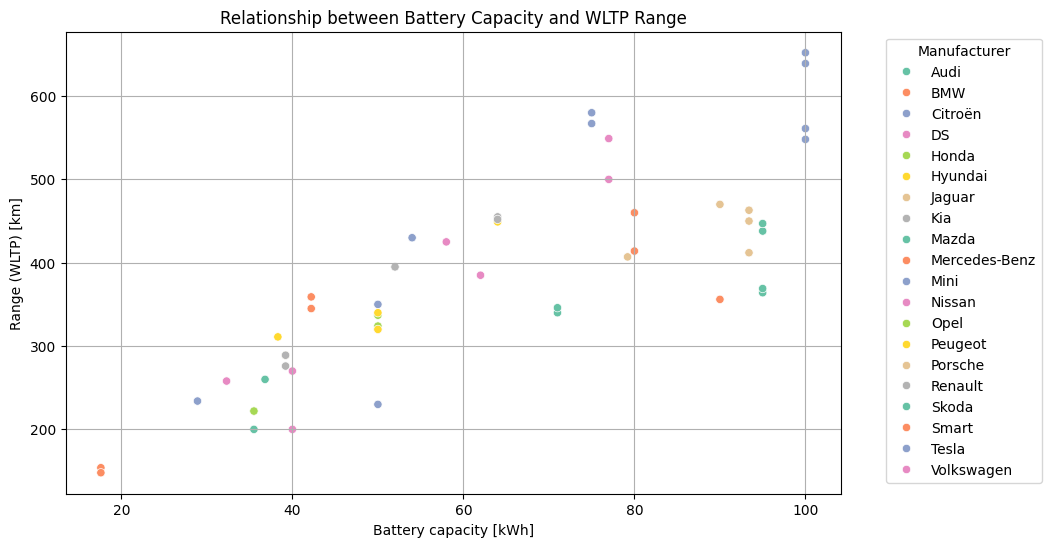


Pearson Correlation between Battery Capacity and Range: 0.81


In [32]:
# Extract variables for plotting
battery_capacity = df["Battery capacity [kWh]"]
range_wltp = df["Range (WLTP) [km]"]

# Scatter plot: Battery capacity vs. Range
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Battery capacity [kWh]", y="Range (WLTP) [km]", hue="Make", palette="Set2")
plt.title("Relationship between Battery Capacity and WLTP Range")
plt.xlabel("Battery capacity [kWh]")
plt.ylabel("Range (WLTP) [km]")
plt.legend(title="Manufacturer", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Calculate the Pearson correlation coefficient
correlation = np.corrcoef(battery_capacity, range_wltp)[0, 1]
print("\nPearson Correlation between Battery Capacity and Range:", round(correlation, 2))


#In the scatter plot, each point represents an EV with its battery capacity on the x-axis and its WLTP range on the y-axis.

#The computed Pearson correlation coefficient quantifies the linear relationship between the two. A strong positive correlation would suggest that EVs with larger batteries generally offer a longer range.

#Task 4 – EV Recommendation Class

We now create an EVRecommender class. This class takes in the EV dataset and provides a method recommend() that accepts a budget, a minimum desired range, and a minimum battery capacity. The recommendation strategy involves:

1.Filtering the dataset based on the user’s criteria.

2.If more than three EVs match, a composite score is calculated as score = (Range + Battery capacity) / Price which approximates value (using both driving range and battery capacity in the numerator and the price in the denominator).

3.The EVs are then sorted by score in descending order and the top three recommendations are returned.

In [50]:
class EVRecommender:
    def __init__(self, data):
        self.data = data.copy()
    
    def recommend(self, max_budget, min_range, min_battery):
        """
        Recommend top 3 EVs based on user's budget, desired minimum range, and minimum battery capacity.
        A composite score = (Range + Battery Capacity) / Price is used to rank the EVs.
        """
        # Filter EVs that meet user criteria:
        filtered = self.data[
            (self.data["Minimal price (gross) [PLN]"] <= max_budget) &
            (self.data["Range (WLTP) [km]"] >= min_range) &
            (self.data["Battery capacity [kWh]"] >= min_battery)
        ].copy()
        
        if filtered.empty:
            print("No EVs match the given criteria.")
            return pd.DataFrame()
        
        # Calculate composite score (modify weights if desired)
        filtered["Score"] = (filtered["Range (WLTP) [km]"] + filtered["Battery capacity [kWh]"]) / filtered["Minimal price (gross) [PLN]"]
        
        # Sort EVs by descending score and take the top three.
        recommended = filtered.sort_values(by=['Range (WLTP) [km]', 'Battery capacity [kWh]'], ascending=[False, False]).head(3)
        
        # Return subset of relevant columns for recommendation
        return recommended[["Make", "Model",
                            "Minimal price (gross) [PLN]", "Range (WLTP) [km]",
                            "Battery capacity [kWh]", "Score"]]

# Create an instance of the recommender
recommender = EVRecommender(df)

# Test the recommendation system with sample criteria:
# Budget: 350,000 PLN, Minimum Range: 400 km, Minimum Battery Capacity: 50 kWh
recommendations = recommender.recommend(max_budget=350000, min_range=400, min_battery=50)

# Print the output neatly in table format using tabulate
if not recommendations.empty:
    print("\nTop 3 EV recommendations for the given criteria:")
    print(tabulate(recommendations, headers='keys', tablefmt='psql', showindex=False))
else:
    print("No EV recommendations match the given criteria.")



Top 3 EV recommendations for the given criteria:
+------------+---------------------+-------------------------------+---------------------+--------------------------+------------+
| Make       | Model               |   Minimal price (gross) [PLN] |   Range (WLTP) [km] |   Battery capacity [kWh] |      Score |
|------------+---------------------+-------------------------------+---------------------+--------------------------+------------|
| Tesla      | Model 3 Long Range  |                        235490 |                 580 |                       75 | 0.00278143 |
| Tesla      | Model 3 Performance |                        260490 |                 567 |                       75 | 0.00246459 |
| Volkswagen | ID.3 Pro S          |                        179990 |                 549 |                       77 | 0.00347797 |
+------------+---------------------+-------------------------------+---------------------+--------------------------+------------+


In [35]:
class EVRecommendation:
    def __init__(self, dataset):
        self.dataset = dataset

    def recommend(self, budget, min_range, min_battery_capacity):
        filtered = self.dataset[(self.dataset['Minimal price (gross) [PLN]'] <= budget) &
                                (self.dataset['Range (WLTP) [km]'] >= min_range) &
                                (self.dataset['Battery capacity [kWh]'] >= min_battery_capacity)]
        top_three = filtered.sort_values(by=['Range (WLTP) [km]', 'Battery capacity [kWh]'], ascending=[False, False]).head(3)
        return top_three[['Make', 'Model', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]', 'Battery capacity [kWh]']]

# Instantiate the class
ev_recommender = EVRecommendation(df)
recommendations = ev_recommender.recommend(budget=350000, min_range=400, min_battery_capacity=50)
print("\nEV Recommendations:")
print(tabulate(recommendations, headers='keys', tablefmt='grid'))


EV Recommendations:
+----+------------+---------------------+-------------------------------+---------------------+--------------------------+
|    | Make       | Model               |   Minimal price (gross) [PLN] |   Range (WLTP) [km] |   Battery capacity [kWh] |
+====+============+=====================+===============================+=====================+==========================+
| 40 | Tesla      | Model 3 Long Range  |                        235490 |                 580 |                       75 |
+----+------------+---------------------+-------------------------------+---------------------+--------------------------+
| 41 | Tesla      | Model 3 Performance |                        260490 |                 567 |                       75 |
+----+------------+---------------------+-------------------------------+---------------------+--------------------------+
| 48 | Volkswagen | ID.3 Pro S          |                        179990 |                 549 |                       

In [37]:
class EVRecommendation:
    def __init__(self, dataset):
        self.dataset = dataset.copy()

    def recommend(self, max_budget, min_range, min_battery):
        filtered = self.dataset[(self.dataset["Minimal price (gross) [PLN]"] <= max_budget) &
                                (self.dataset["Range (WLTP) [km]"] >= min_range) &
                                (self.dataset["Battery capacity [kWh]"] >= min_battery)].copy()
        
        if filtered.empty:
            print("No EVs match the given criteria.")
            return pd.DataFrame()
        
        filtered["Score"] = (filtered["Range (WLTP) [km]"] + filtered["Battery capacity [kWh]"]) / filtered["Minimal price (gross) [PLN]"]
        recommended = filtered.sort_values(by="Score", ascending=False).head(3)
        return recommended[["Car full name", "Make", "Model", "Minimal price (gross) [PLN]", "Range (WLTP) [km]", "Battery capacity [kWh]", "Score"]]

# Instantiate the class
ev_recommender = EVRecommendation(df)
recommendations = ev_recommender.recommend(max_budget=350000, min_range=400, min_battery=50)
print("\nEV Recommendations:")
print(tabulate(recommendations, headers='keys', tablefmt='grid'))


EV Recommendations:
+----+---------------------------------+------------+----------------------+-------------------------------+---------------------+--------------------------+------------+
|    | Car full name                   | Make       | Model                |   Minimal price (gross) [PLN] |   Range (WLTP) [km] |   Battery capacity [kWh] |      Score |
+====+=================================+============+======================+===============================+=====================+==========================+============+
| 48 | Volkswagen ID.3 Pro S           | Volkswagen | ID.3 Pro S           |                        179990 |                 549 |                       77 | 0.00347797 |
+----+---------------------------------+------------+----------------------+-------------------------------+---------------------+--------------------------+------------+
| 20 | Kia e-Soul 64kWh                | Kia        | e-Soul 64kWh         |                        160990 |                

#Task 5 – Hypothesis Testing:

Objective: Test whether there is a significant difference in the average engine power (in KM) between vehicles by Tesla and Audi.

Steps:

1.Filter the DataFrame for Tesla and Audi.

2.Drop missing values in the Engine power [KM] column.

3.Use the two-sample t-test (ttest_ind from SciPy) to check if the means differ significantly.

4.Interpret the t-statistic and p-value (with a significance level of 0.05).

In [51]:
# Filter EVs for Tesla and Audi
tesla_cars = df[df["Make"] == "Tesla"]["Engine power [KM]"].dropna()
audi_cars  = df[df["Make"] == "Audi"]["Engine power [KM]"].dropna()

# Perform the two-sample t-test (Welch’s t-test, with equal_var=False)
t_stat, p_value = ttest_ind(tesla_cars, audi_cars, equal_var=False)

print("\nHypothesis Testing for Differences in Engine Power between Tesla and Audi")
print("T-statistic:", round(t_stat, 2))
print("P-value:", round(p_value, 4))

# Interpretation based on a significance level of 0.05
if p_value < 0.05:
    print("There is a statistically significant difference in the average engine power between Tesla and Audi.")
else:
    print("There is no statistically significant difference in the average engine power between Tesla and Audi.")



Hypothesis Testing for Differences in Engine Power between Tesla and Audi
T-statistic: 1.79
P-value: 0.1068
There is no statistically significant difference in the average engine power between Tesla and Audi.


In [52]:
tesla_power = df[df["Make"] == "Tesla"]["Engine power [KM]"].dropna()
audi_power = df[df["Make"] == "Audi"]["Engine power [KM]"].dropna()
t_stat, p_value = ttest_ind(tesla_power, audi_power)

print("\nHypothesis Testing Results:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in engine power between Tesla and Audi.")
else:
    print("There is no significant difference in engine power between Tesla and Audi.")


Hypothesis Testing Results:
T-Statistic: 1.7024444538261416
P-Value: 0.11672692675082785
There is no significant difference in engine power between Tesla and Audi.
